In [68]:
# import libraries
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print(plt.style.available)
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFECV, SelectKBest, f_regression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

import xgboost as xgb

pd.options.display.max_columns =25
pd.options.display.max_rows = 100

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [69]:
file_path = '/content/default of credit card clients.csv'
df = pd.read_csv(file_path, header=None)
df.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,NaN,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
2,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
3,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
4,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [70]:
file_path = '/content/default of credit card clients.csv'
df = pd.read_csv(file_path, header=None)
df.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,NaN,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
2,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
3,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
4,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [71]:
df = pd.read_csv('/content/default of credit card clients.csv', header=1)
df = df.drop(index=0).reset_index(drop=True)
df.columns = df.columns.str.strip().str.replace(" ", "_")
df.drop(columns=['ID'], inplace=True)
df.rename(columns={'PAY_0': 'PAY_1', 'default_payment_next_month': 'Default_Flag'}, inplace=True)
print(df.columns)


Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'Default_Flag'],
      dtype='object')


In [72]:
df = df.apply(pd.to_numeric, errors='raise')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   LIMIT_BAL     29999 non-null  int64
 1   SEX           29999 non-null  int64
 2   EDUCATION     29999 non-null  int64
 3   MARRIAGE      29999 non-null  int64
 4   AGE           29999 non-null  int64
 5   PAY_1         29999 non-null  int64
 6   PAY_2         29999 non-null  int64
 7   PAY_3         29999 non-null  int64
 8   PAY_4         29999 non-null  int64
 9   PAY_5         29999 non-null  int64
 10  PAY_6         29999 non-null  int64
 11  BILL_AMT1     29999 non-null  int64
 12  BILL_AMT2     29999 non-null  int64
 13  BILL_AMT3     29999 non-null  int64
 14  BILL_AMT4     29999 non-null  int64
 15  BILL_AMT5     29999 non-null  int64
 16  BILL_AMT6     29999 non-null  int64
 17  PAY_AMT1      29999 non-null  int64
 18  PAY_AMT2      29999 non-null  int64
 19  PAY_AMT3      29999 non-n

In [73]:
invalid_edu = df['EDUCATION'].isin([0, 5, 6])
df['EDUCATION'] = df['EDUCATION'].where(~invalid_edu, 4)


In [74]:
df['MARRIAGE'] = df['MARRIAGE'].replace(0, 3)
df['MARRIAGE'].value_counts()


,count
MARRIAGE,
2,15964
1,13658
3,377


**EDA**




In [75]:
df.mean()

,0
LIMIT_BAL,167489.238975
SEX,1.603720
EDUCATION,1.842261
MARRIAGE,1.557285
AGE,35.485883
PAY_1,-0.016767
PAY_2,-0.133838
PAY_3,-0.166172
PAY_4,-0.220641
PAY_5,-0.266142


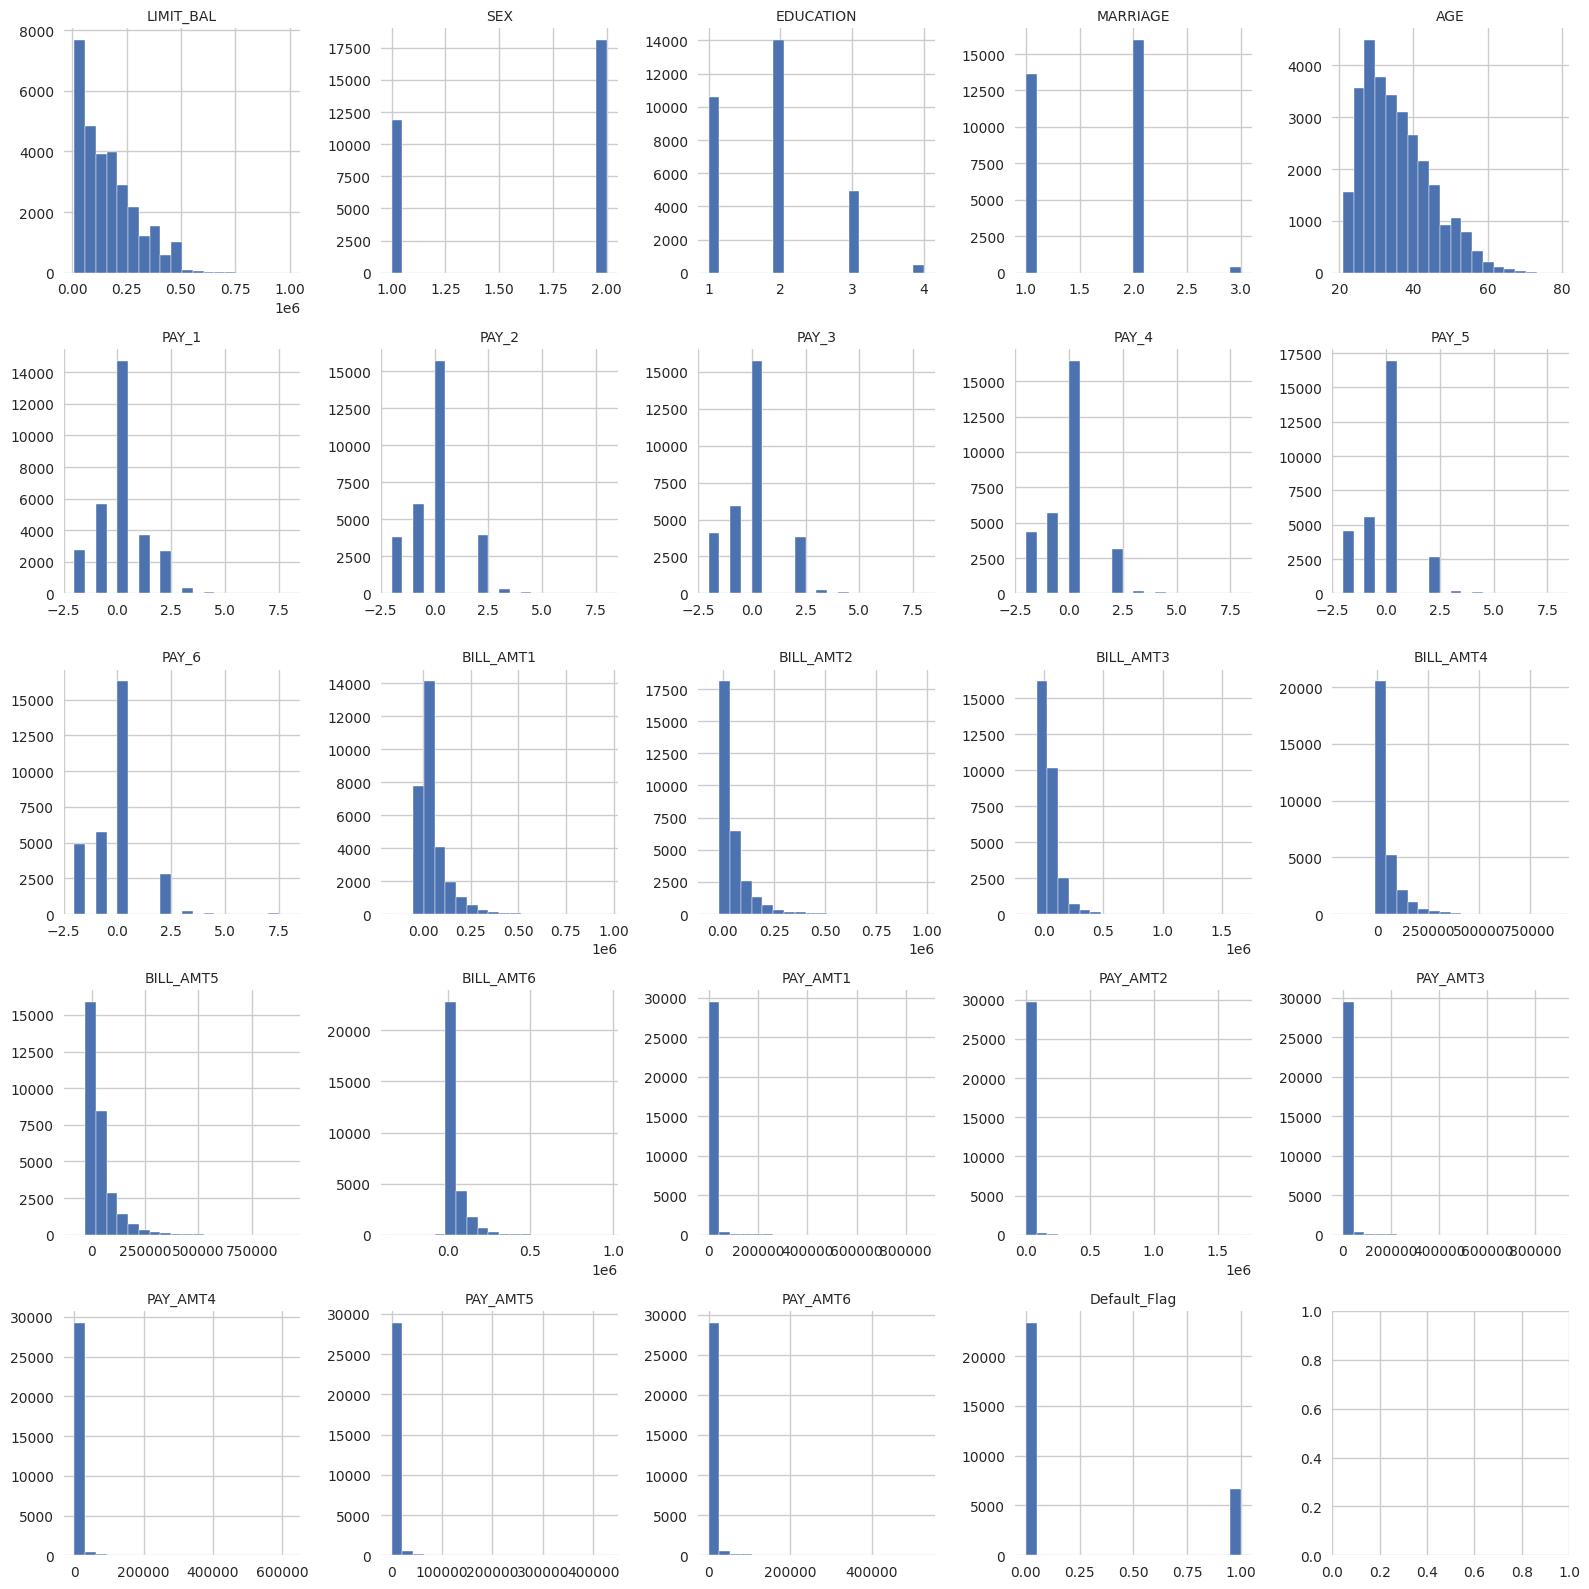

In [76]:
fig, axes = plt.subplots(5, 5, figsize=(16, 16))

for idx, feature in enumerate(df.columns):
    row, col = divmod(idx, 5)
    axes[row, col].hist(df[feature], bins=20)
    axes[row, col].set_title(feature, fontsize=10)

plt.tight_layout()
plt.show()


**How many people default on their credit card payment?**


Default_Flag
0    23364
1     6635
Name: count, dtype: int64
Default_Flag
0    0.778826
1    0.221174
Name: proportion, dtype: float64


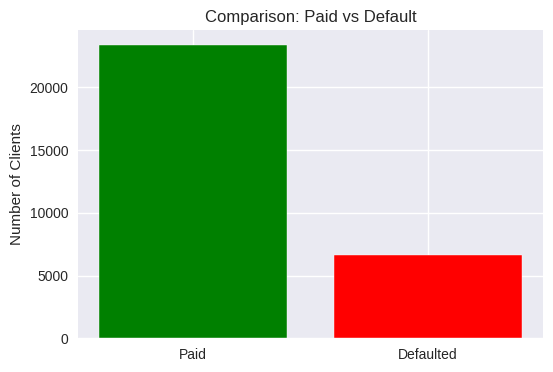

In [77]:
y = df['Default_Flag']
print(y.value_counts())
print(y.value_counts(normalize=True))

plt.style.use('seaborn-v0_8')
plt.figure(figsize=(6, 4))
plt.bar(['Paid', 'Defaulted'], y.value_counts(), color=['green', 'red'])
plt.title('Comparison: Paid vs Default')
plt.ylabel('Number of Clients')
plt.show()


**Amount paid vs Month paid**

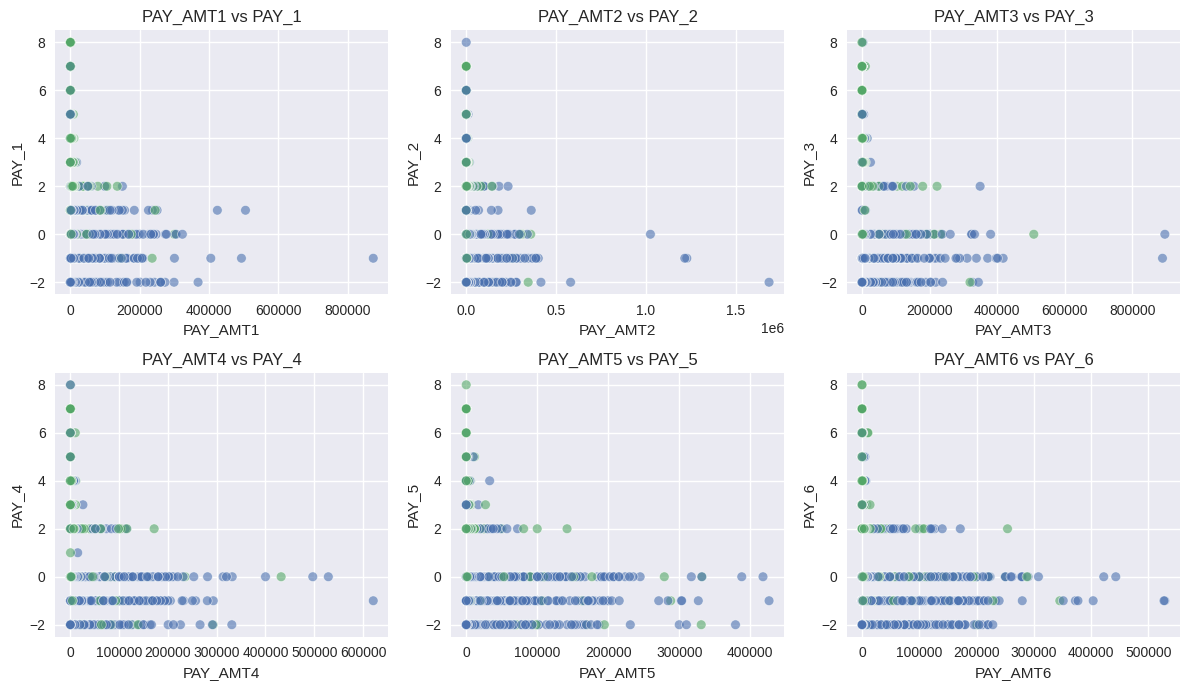

In [78]:
fig, axes = plt.subplots(2, 3, figsize=(12, 7))

for i in range(6):
    col_amt = f'PAY_AMT{i+1}'
    col_status = f'PAY_{i+1}'
    sns.scatterplot(
        x=df[col_amt],
        y=df[col_status],
        hue=df['Default_Flag'],
        ax=axes[i//3][i%3],
        legend=False,
        alpha=0.6
    )
    axes[i//3][i%3].set_title(f'{col_amt} vs {col_status}')

plt.tight_layout()
plt.show()


**Bill Amount vs Pay Amount**

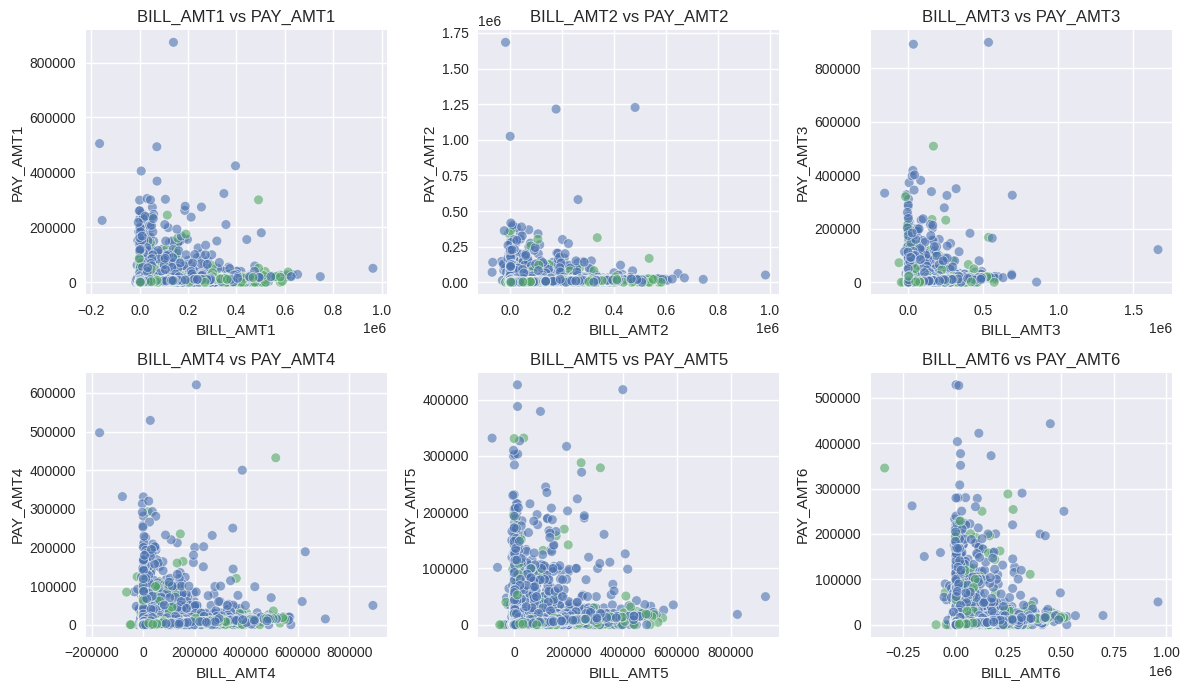

In [79]:
fig, axes = plt.subplots(2, 3, figsize=(12, 7))

for i in range(6):
    bill_col = f'BILL_AMT{i+1}'
    pay_col = f'PAY_AMT{i+1}'
    sns.scatterplot(
        x=df[bill_col],
        y=df[pay_col],
        hue=df['Default_Flag'],
        ax=axes[i//3][i%3],
        legend=False,
        alpha=0.6
    )
    axes[i//3][i%3].set_title(f'{bill_col} vs {pay_col}')

plt.tight_layout()
plt.show()


**Demographic Analysis**

Gender


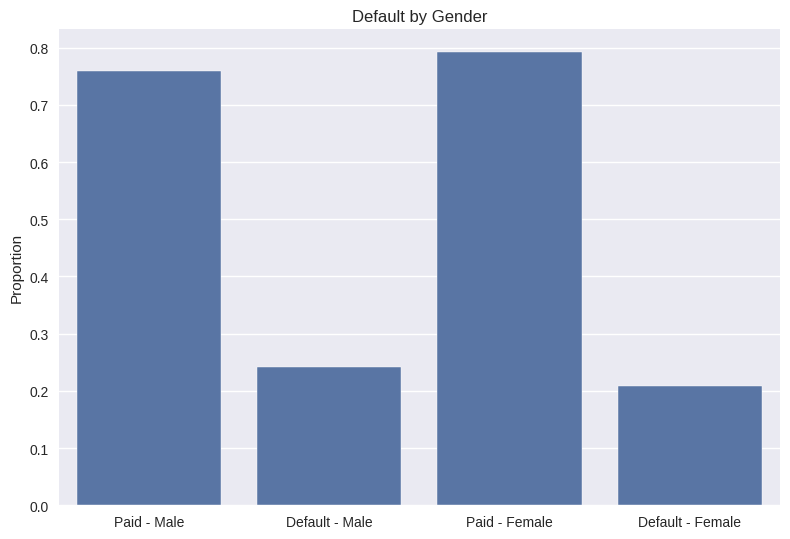

In [80]:
gender_stats = df.groupby('SEX')['Default_Flag'].value_counts(normalize=True).unstack()

sns.barplot(
    x=['Paid - Male', 'Default - Male', 'Paid - Female', 'Default - Female'],
    y=[gender_stats.loc[1, 0], gender_stats.loc[1, 1],
       gender_stats.loc[2, 0], gender_stats.loc[2, 1]]
)

plt.title('Default by Gender')
plt.ylabel('Proportion')
plt.tight_layout()
plt.show()


**Education**


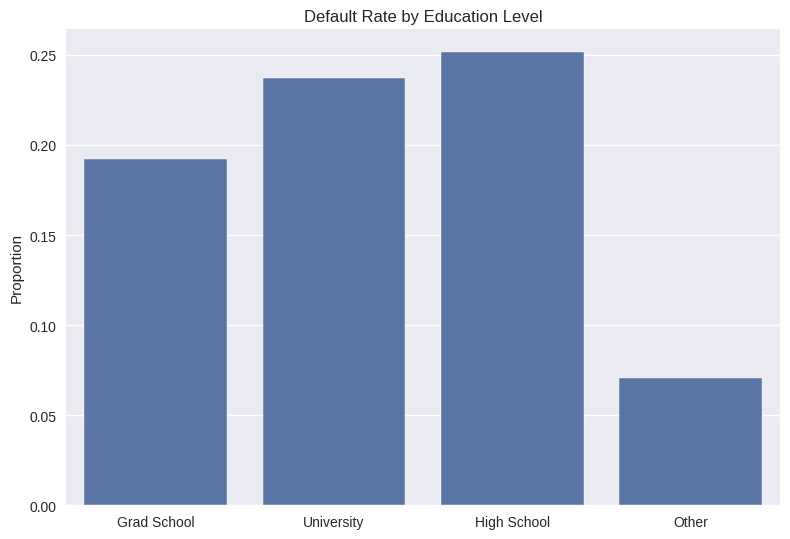

In [81]:
edu_default = df.groupby('EDUCATION')['Default_Flag'].value_counts(normalize=True).unstack().fillna(0)

sns.barplot(
    x=['Grad School', 'University', 'High School', 'Other'],
    y=[
        edu_default.loc[1, 1],
        edu_default.loc[2, 1],
        edu_default.loc[3, 1],
        edu_default.loc[4, 1]
    ]
)

plt.title('Default Rate by Education Level')
plt.ylabel('Proportion')
plt.tight_layout()
plt.show()


**Martial Status**

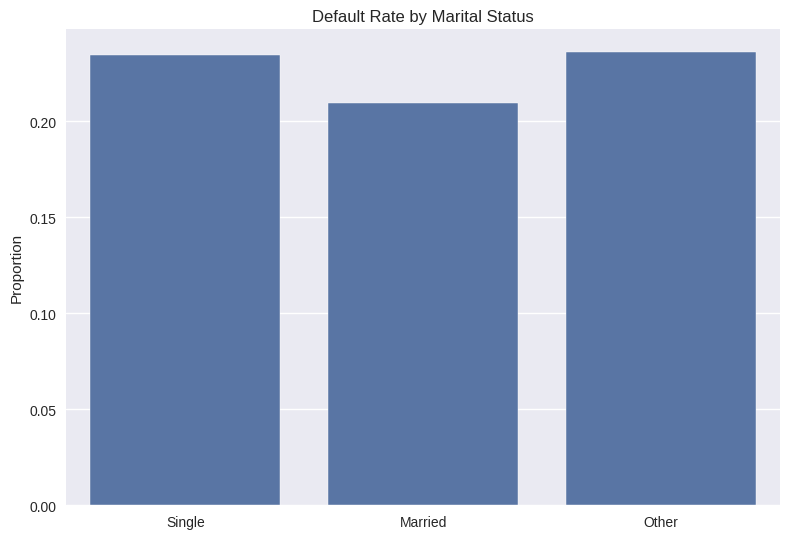

In [82]:
marital_stats = df.groupby('MARRIAGE')['Default_Flag'].value_counts(normalize=True).unstack().fillna(0)

sns.barplot(
    x=['Single', 'Married', 'Other'],
    y=[
        marital_stats.loc[1, 1],
        marital_stats.loc[2, 1],
        marital_stats.loc[3, 1]
    ]
)

plt.title('Default Rate by Marital Status')
plt.ylabel('Proportion')
plt.tight_layout()
plt.show()


**AGE**

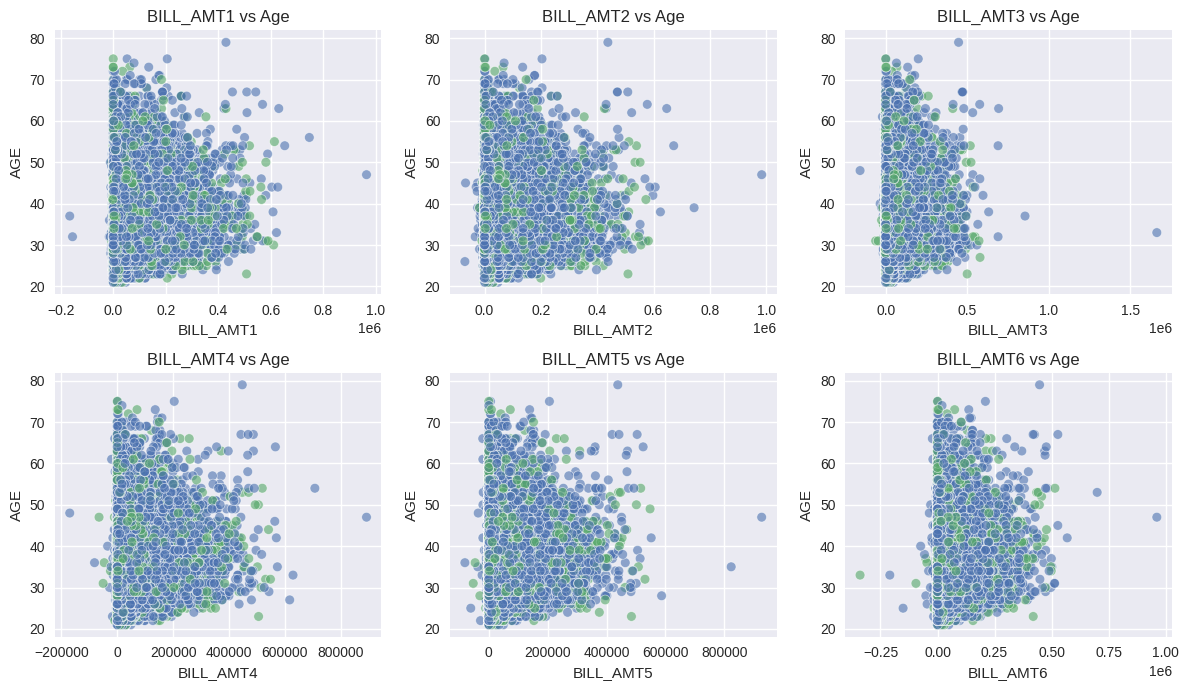

In [83]:
#Age and bill

fig, axes = plt.subplots(2, 3, figsize=(12, 7))

for i in range(6):
    col = f'BILL_AMT{i+1}'
    sns.scatterplot(
        x=df[col],
        y=df['AGE'],
        hue=df['Default_Flag'],
        ax=axes[i//3][i%3],
        legend=False,
        alpha=0.6
    )
    axes[i//3][i%3].set_title(f'{col} vs Age')

plt.tight_layout()
plt.show()


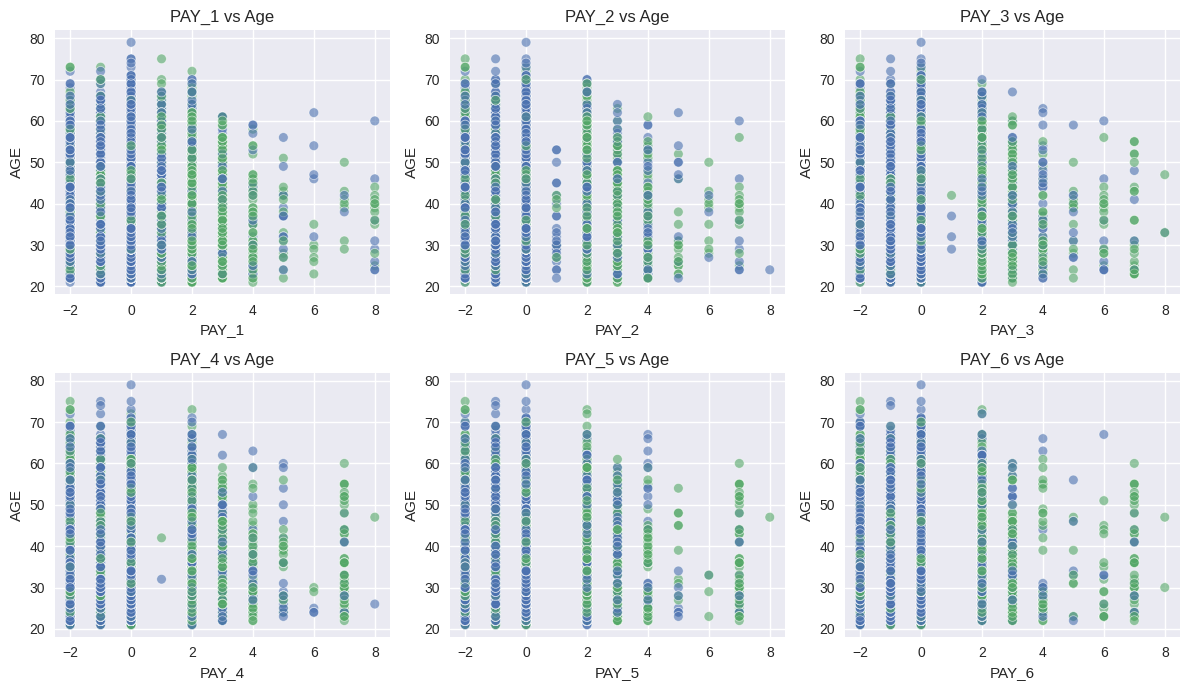

In [84]:
#age and pay
fig, axes = plt.subplots(2, 3, figsize=(12, 7))

for i in range(6):
    pay_col = f'PAY_{i+1}'
    sns.scatterplot(
        x=df[pay_col],
        y=df['AGE'],
        hue=df['Default_Flag'],
        ax=axes[i//3][i%3],
        legend=False,
        alpha=0.6
    )
    axes[i//3][i%3].set_title(f'{pay_col} vs Age')

plt.tight_layout()
plt.show()


**Limit and balance**

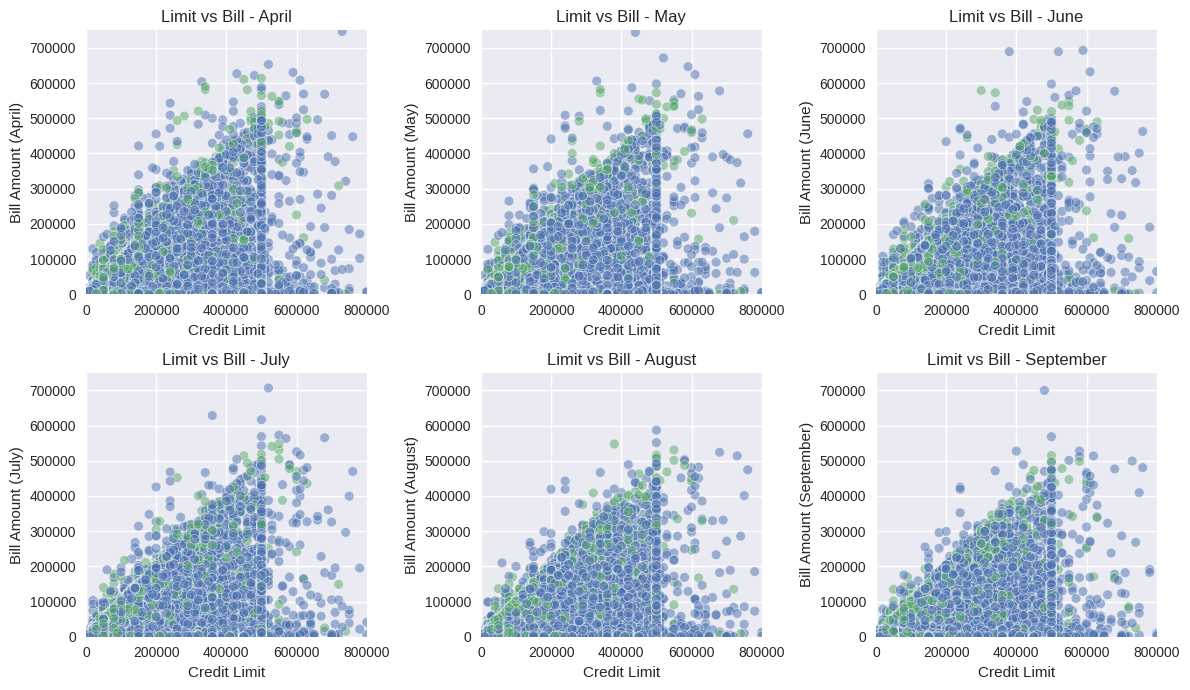

In [85]:
fig, axes = plt.subplots(2, 3, figsize=(12, 7))

months = ['April', 'May', 'June', 'July', 'August', 'September']

for i in range(6):
    bill_col = f'BILL_AMT{i+1}'
    sns.scatterplot(
        x=df['LIMIT_BAL'],
        y=df[bill_col],
        hue=df['Default_Flag'],
        ax=axes[i//3][i%3],
        legend=False,
        alpha=0.5
    )
    axes[i//3][i%3].set_title(f'Limit vs Bill - {months[i]}')
    axes[i//3][i%3].set_xlabel('Credit Limit')
    axes[i//3][i%3].set_ylabel(f'Bill Amount ({months[i]})')
    axes[i//3][i%3].set_xlim(0, 800000)
    axes[i//3][i%3].set_ylim(0, 750000)

plt.tight_layout()
plt.show()


**Mean Bill & Mean Pay**

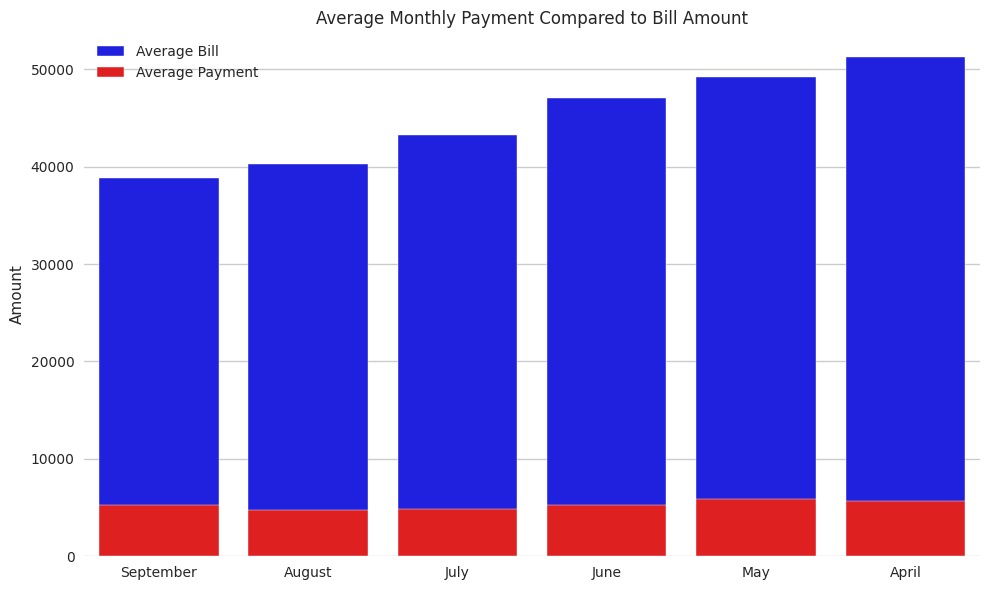

PAY_AMT1
0        5248
2000     1363
3000      891
5000      698
1500      507
         ... 
14594       1
6307        1
4035        1
14302       1
19428       1
Name: count, Length: 7943, dtype: int64


In [86]:
months = ['April', 'May', 'June', 'July', 'August', 'September']

avg_bill = [df[f'BILL_AMT{i+1}'].mean() for i in range(6)]
avg_payment = [df[f'PAY_AMT{i+1}'].mean() for i in range(6)]

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

sns.barplot(x=months[::-1], y=avg_bill[::-1], color='blue', label='Average Bill')
sns.barplot(x=months[::-1], y=avg_payment[::-1], color='red', label='Average Payment')

plt.title('Average Monthly Payment Compared to Bill Amount')
plt.ylabel('Amount')
plt.legend()
plt.tight_layout()
plt.show()

print(df['PAY_AMT1'].value_counts())


In [87]:
X = df.drop(columns=['Default_Flag'])
y = df['Default_Flag']

X_train_80, X_test_20, y_train_80, y_test_20 = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Training shape:", X_train_80.shape)
print("Testing shape:", X_test_20.shape)


Training shape: (23999, 23)
Testing shape: (6000, 23)


In [88]:
X_train_enc = pd.get_dummies(X_train_80, columns=['SEX', 'EDUCATION', 'MARRIAGE'], drop_first=True)
X_test_enc = pd.get_dummies(X_test_20, columns=['SEX', 'EDUCATION', 'MARRIAGE'], drop_first=True)

X_test_enc = X_test_enc.reindex(columns=X_train_enc.columns, fill_value=0)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_enc)
X_test_scaled = scaler.transform(X_test_enc)

print("Encoded feature count:", X_train_enc.shape[1])
print("First 5 rows (encoded, unscaled):")
display(X_train_enc.head())

Encoded feature count: 26
First 5 rows (encoded, unscaled):


,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_2,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_2,MARRIAGE_3
9132,50000,26,-1,-1,-1,-2,-1,3,528,378,-150,-678,...,378,0,0,3263,0,0,True,True,False,False,True,False
13002,280000,25,-1,-1,0,0,0,0,3863,84601,67765,63628,...,89295,2192,1899,1673,2125,1511,False,True,False,False,False,False
22457,30000,41,0,0,0,0,0,0,26300,27308,28425,29233,...,1450,1560,1350,1000,801,1000,True,False,False,False,False,False
27710,230000,24,0,0,2,0,0,0,64929,65093,59349,56418,...,6000,0,3000,2000,1500,3000,True,True,False,False,True,False
23354,30000,28,3,2,2,5,5,4,1200,1200,1200,1200,...,0,0,0,0,0,0,True,True,False,False,True,False


**SMOTE**

In [89]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train_80)

print("Before SMOTE:", np.bincount(y_train_80))
print("After SMOTE:", np.bincount(y_train_resampled))
print("Resampled shape:", X_train_resampled.shape)


Before SMOTE: [18691  5308]
After SMOTE: [18691 18691]
Resampled shape: (37382, 26)


**FEATURE ENGINEERING**

In [90]:
X_train_enc['Avg_Bill'] = X_train_enc[[f'BILL_AMT{i+1}' for i in range(6)]].mean(axis=1)
X_train_enc['Avg_Pay'] = X_train_enc[[f'PAY_AMT{i+1}' for i in range(6)]].mean(axis=1)
X_train_enc['Pay_Ratio'] = X_train_enc['Avg_Pay'] / (X_train_enc['Avg_Bill'] + 1)

X_test_enc['Avg_Bill'] = X_test_enc[[f'BILL_AMT{i+1}' for i in range(6)]].mean(axis=1)
X_test_enc['Avg_Pay'] = X_test_enc[[f'PAY_AMT{i+1}' for i in range(6)]].mean(axis=1)
X_test_enc['Pay_Ratio'] = X_test_enc['Avg_Pay'] / (X_test_enc['Avg_Bill'] + 1)

# Fill any NaNs (if any) caused by division
X_train_enc.fillna(0, inplace=True)
X_test_enc.fillna(0, inplace=True)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_enc)
X_test_scaled = scaler.transform(X_test_enc)

print("NaNs handled. Scaled features shape:", X_train_scaled.shape)


NaNs handled. Scaled features shape: (23999, 29)


In [91]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train_80)

print("Before SMOTE:", np.bincount(y_train_80))
print("After SMOTE:", np.bincount(y_train_resampled))
print("Resampled training shape:", X_train_resampled.shape)


Before SMOTE: [18691  5308]
After SMOTE: [18691 18691]
Resampled training shape: (37382, 29)


In [92]:
log_model = LogisticRegression(max_iter=1000, random_state=42)

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}

grid_search = GridSearchCV(log_model, param_grid, scoring='f1', cv=5)
grid_search.fit(X_train_resampled, y_train_resampled)


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=42),
             param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['l2'],
                         'solver': ['lbfgs']},
             scoring='f1')

In [93]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

print("F1 Score on Test Set:", f1_score(y_test_20, y_pred))
print("\nClassification Report:\n", classification_report(y_test_20, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test_20, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test_20, best_model.predict_proba(X_test_scaled)[:, 1]))


F1 Score on Test Set: 0.4669365721997301

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.68      0.76      4673
           1       0.36      0.65      0.47      1327

    accuracy                           0.67      6000
   macro avg       0.62      0.66      0.61      6000
weighted avg       0.76      0.67      0.70      6000

Confusion Matrix:
 [[3160 1513]
 [ 462  865]]
ROC AUC Score: 0.7248249536249465


**Advanced Feature Engineering**

In [94]:
df['Missed_Payment_Flag'] = (df[[f'PAY_{i+1}' for i in range(6)]] > 0).any(axis=1).astype(int)
df['Limit_Age_Ratio'] = df['LIMIT_BAL'] / (df['AGE'] + 1)
df['Avg_Pay_Growth'] = df[[f'PAY_AMT{i+1}' for i in range(6)]].diff(axis=1).mean(axis=1).fillna(0)


**Class Imbalance (SMOTE-ENN instead of plain SMOTE)**

In [95]:
from imblearn.combine import SMOTEENN

smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X_train_scaled, y_train_80)

print("New shape:", X_resampled.shape)
print("Class balance:", np.bincount(y_resampled))


New shape: (23939, 29)
Class balance: [ 9805 14134]


**Better Hyperparameter Search (RandomizedSearchCV)**

In [96]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# Sample down the SMOTE-resampled data
X_sub, _, y_sub, _ = train_test_split(X_resampled, y_resampled, train_size=0.5, stratify=y_resampled, random_state=42)

# Parameter grid (same as before)
param_dist = {
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'subsample': [0.7, 0.8, 1.0]
}

# Run randomized search with fewer iterations and parallel processing
gb_model = GradientBoostingClassifier(random_state=42)
random_search = RandomizedSearchCV(
    gb_model,
    param_distributions=param_dist,
    n_iter=5,
    cv=3,
    scoring='f1',
    n_jobs=-1
)

random_search.fit(X_sub, y_sub)

print("Best Parameters:", random_search.best_params_)
print("Best F1 Score (CV):", random_search.best_score_)


Best Parameters: {'subsample': 0.8, 'n_estimators': 150, 'max_depth': 5, 'learning_rate': 0.1}
Best F1 Score (CV): 0.9096789688760064


**Model Explainability with SHAP**

In [97]:
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train_resampled, y_train_resampled)


GradientBoostingClassifier(random_state=42)

PermutationExplainer explainer: 6001it [06:02, 16.10it/s]


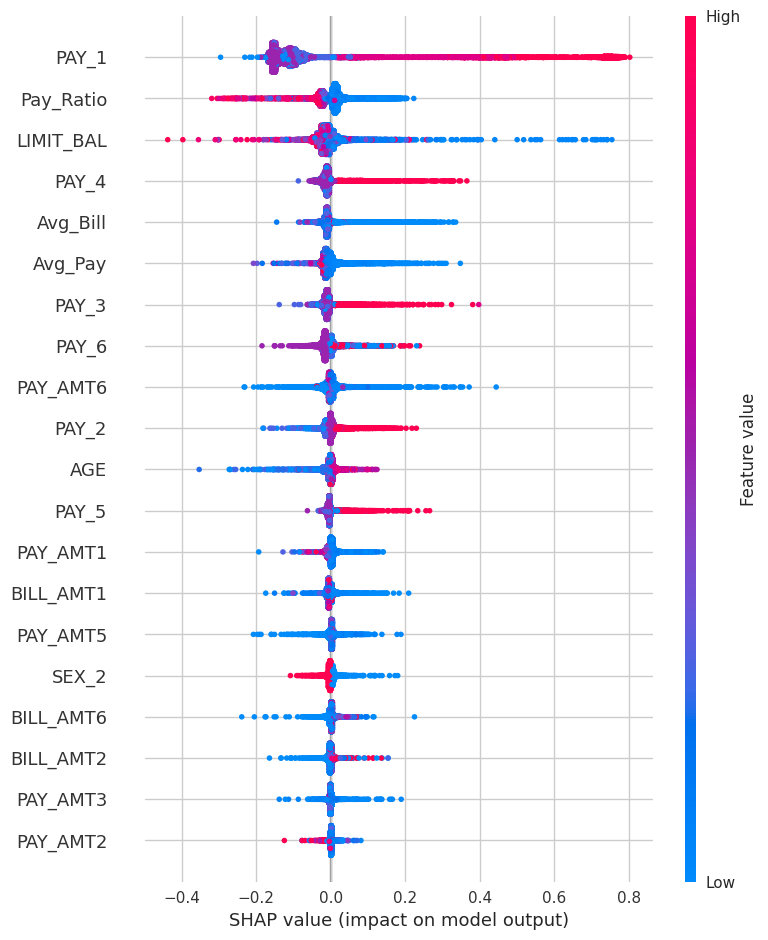

In [98]:
import shap

explainer = shap.Explainer(gb_model.predict, X_test_scaled)
shap_values = explainer(X_test_scaled)

shap.summary_plot(shap_values, X_test_scaled, feature_names=X_test_enc.columns)


In [99]:
!pip install catboost


In [100]:
# LightGBM
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(random_state=42)
lgbm.fit(X_resampled, y_resampled)

# CatBoost
from catboost import CatBoostClassifier
catboost = CatBoostClassifier(verbose=0, random_state=42)
catboost.fit(X_resampled, y_resampled)


[LightGBM] [Info] Number of positive: 14134, number of negative: 9805
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005203 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6639
[LightGBM] [Info] Number of data points in the train set: 23939, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.590417 -> initscore=0.365691
[LightGBM] [Info] Start training from score 0.365691


In [101]:
# LightGBM
y_pred_lgbm = lgbm.predict(X_test_scaled)
print("LightGBM F1 Score:", f1_score(y_test_20, y_pred_lgbm))
print("LightGBM ROC AUC:", roc_auc_score(y_test_20, lgbm.predict_proba(X_test_scaled)[:, 1]))

# CatBoost
y_pred_cat = catboost.predict(X_test_scaled)
print("\nCatBoost F1 Score:", f1_score(y_test_20, y_pred_cat))
print("CatBoost ROC AUC:", roc_auc_score(y_test_20, catboost.predict_proba(X_test_scaled)[:, 1]))


LightGBM F1 Score: 0.5222551928783383
LightGBM ROC AUC: 0.7622073670822346

CatBoost F1 Score: 0.5266414575455483
CatBoost ROC AUC: 0.7612123776683093


In [102]:
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('clf', GradientBoostingClassifier(random_state=42))
])

scores = cross_val_score(pipeline, X_train_enc, y_train_80, cv=5, scoring='f1')
print("Cross-validated F1 scores:", scores)
print("Average F1:", scores.mean())


Cross-validated F1 scores: [0.51977401 0.51662651 0.54014599 0.54320988 0.52459016]
Average F1: 0.5288693086405256


In [103]:
X_train_enc = pd.get_dummies(X_train_80, columns=['SEX', 'EDUCATION', 'MARRIAGE'], drop_first=True)

X_train_enc['Avg_Bill'] = X_train_enc[[f'BILL_AMT{i+1}' for i in range(6)]].mean(axis=1)
X_train_enc['Avg_Pay'] = X_train_enc[[f'PAY_AMT{i+1}' for i in range(6)]].mean(axis=1)
X_train_enc['Pay_Ratio'] = X_train_enc['Avg_Pay'] / (X_train_enc['Avg_Bill'] + 1)

X_train_enc.fillna(0, inplace=True)


In [104]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_enc)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train_80)

print("Resampled shape:", X_resampled.shape)
print("Class balance:", np.bincount(y_resampled))


Resampled shape: (37382, 29)
Class balance: [18691 18691]


**Logistic Regression on the full balanced data**

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, classification_report, roc_auc_score, confusion_matrix

log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_resampled, y_resampled)

y_pred_lr = log_model.predict(X_test_scaled)

print("Logistic Regression F1 Score:", f1_score(y_test_20, y_pred_lr))
print("ROC AUC Score:", roc_auc_score(y_test_20, log_model.predict_proba(X_test_scaled)[:, 1]))
print("\nClassification Report:\n", classification_report(y_test_20, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test_20, y_pred_lr))


Logistic Regression F1 Score: 0.4667205604958232
ROC AUC Score: 0.7240673425606642

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.68      0.76      4673
           1       0.36      0.65      0.47      1327

    accuracy                           0.67      6000
   macro avg       0.62      0.66      0.61      6000
weighted avg       0.76      0.67      0.70      6000

Confusion Matrix:
 [[3155 1518]
 [ 461  866]]


**Decision Tree Classifier**

In [106]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(max_depth=10, criterion='gini', random_state=42)
dt_model.fit(X_resampled, y_resampled)

y_pred_dt = dt_model.predict(X_test_scaled)

print("Decision Tree F1 Score:", f1_score(y_test_20, y_pred_dt))
print("ROC AUC Score:", roc_auc_score(y_test_20, dt_model.predict_proba(X_test_scaled)[:, 1]))
print("\nClassification Report:\n", classification_report(y_test_20, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test_20, y_pred_dt))


Decision Tree F1 Score: 0.48198057035412095
ROC AUC Score: 0.7220380963223934

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.77      0.81      4673
           1       0.41      0.58      0.48      1327

    accuracy                           0.72      6000
   macro avg       0.64      0.67      0.65      6000
weighted avg       0.77      0.72      0.74      6000

Confusion Matrix:
 [[3578 1095]
 [ 558  769]]


**Random Forest Classifier**

In [107]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=20,
    min_samples_split=2,
    random_state=42
)

rf_model.fit(X_resampled, y_resampled)
y_pred_rf = rf_model.predict(X_test_scaled)

print("Random Forest F1 Score:", f1_score(y_test_20, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test_20, rf_model.predict_proba(X_test_scaled)[:, 1]))
print("\nClassification Report:\n", classification_report(y_test_20, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test_20, y_pred_rf))


Random Forest F1 Score: 0.515527950310559
ROC AUC Score: 0.7569815762470709

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.87      0.87      4673
           1       0.53      0.50      0.52      1327

    accuracy                           0.79      6000
   macro avg       0.70      0.69      0.69      6000
weighted avg       0.79      0.79      0.79      6000

Confusion Matrix:
 [[4088  585]
 [ 663  664]]


**XGBoost Classifier**

In [108]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

xgb_model.fit(X_resampled, y_resampled)
y_pred_xgb = xgb_model.predict(X_test_scaled)

print("XGBoost F1 Score:", f1_score(y_test_20, y_pred_xgb))
print("ROC AUC Score:", roc_auc_score(y_test_20, xgb_model.predict_proba(X_test_scaled)[:, 1]))
print("\nClassification Report:\n", classification_report(y_test_20, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test_20, y_pred_xgb))


XGBoost F1 Score: 0.5027322404371585
ROC AUC Score: 0.7592375575122425

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.87      0.87      4673
           1       0.52      0.49      0.50      1327

    accuracy                           0.79      6000
   macro avg       0.69      0.68      0.68      6000
weighted avg       0.78      0.79      0.78      6000

Confusion Matrix:
 [[4082  591]
 [ 683  644]]


**Gradient Boosting Classifier**

In [109]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

gb_model.fit(X_resampled, y_resampled)
y_pred_gb = gb_model.predict(X_test_scaled)

print("Gradient Boosting F1 Score:", f1_score(y_test_20, y_pred_gb))
print("ROC AUC Score:", roc_auc_score(y_test_20, gb_model.predict_proba(X_test_scaled)[:, 1]))
print("\nClassification Report:\n", classification_report(y_test_20, y_pred_gb))
print("Confusion Matrix:\n", confusion_matrix(y_test_20, y_pred_gb))


Gradient Boosting F1 Score: 0.5177277926038887
ROC AUC Score: 0.7652189436308663

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.87      0.87      4673
           1       0.52      0.51      0.52      1327

    accuracy                           0.79      6000
   macro avg       0.69      0.69      0.69      6000
weighted avg       0.79      0.79      0.79      6000

Confusion Matrix:
 [[4056  617]
 [ 648  679]]


**K-Nearest Neighbors**

In [110]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_resampled, y_resampled)

y_pred_knn = knn_model.predict(X_test_scaled)

print("KNN F1 Score:", f1_score(y_test_20, y_pred_knn))
print("ROC AUC Score:", roc_auc_score(y_test_20, knn_model.predict_proba(X_test_scaled)[:, 1]))
print("\nClassification Report:\n", classification_report(y_test_20, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test_20, y_pred_knn))


KNN F1 Score: 0.43976737745776795
ROC AUC Score: 0.6787794398741767

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.68      0.76      4673
           1       0.35      0.60      0.44      1327

    accuracy                           0.66      6000
   macro avg       0.60      0.64      0.60      6000
weighted avg       0.74      0.66      0.69      6000

Confusion Matrix:
 [[3183 1490]
 [ 533  794]]


**LightGBM Classifier**

In [111]:
from lightgbm import LGBMClassifier

lgbm_model = LGBMClassifier(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    random_state=42
)

lgbm_model.fit(X_resampled, y_resampled)
y_pred_lgbm = lgbm_model.predict(X_test_scaled)

print("LightGBM F1 Score:", f1_score(y_test_20, y_pred_lgbm))
print("ROC AUC Score:", roc_auc_score(y_test_20, lgbm_model.predict_proba(X_test_scaled)[:, 1]))
print("\nClassification Report:\n", classification_report(y_test_20, y_pred_lgbm))
print("Confusion Matrix:\n", confusion_matrix(y_test_20, y_pred_lgbm))


[LightGBM] [Info] Number of positive: 18691, number of negative: 18691
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004672 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6597
[LightGBM] [Info] Number of data points in the train set: 37382, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

**CatBoost Classifier**

In [112]:
from catboost import CatBoostClassifier

catboost_model = CatBoostClassifier(
    iterations=100,
    learning_rate=0.1,
    depth=5,
    verbose=0,
    random_state=42
)

catboost_model.fit(X_resampled, y_resampled)
y_pred_cat = catboost_model.predict(X_test_scaled)

print("CatBoost F1 Score:", f1_score(y_test_20, y_pred_cat))
print("ROC AUC Score:", roc_auc_score(y_test_20, catboost_model.predict_proba(X_test_scaled)[:, 1]))
print("\nClassification Report:\n", classification_report(y_test_20, y_pred_cat))
print("Confusion Matrix:\n", confusion_matrix(y_test_20, y_pred_cat))


CatBoost F1 Score: 0.516258530710558
ROC AUC Score: 0.7664851765122508

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.89      0.87      4673
           1       0.55      0.48      0.52      1327

    accuracy                           0.80      6000
   macro avg       0.71      0.69      0.69      6000
weighted avg       0.79      0.80      0.79      6000

Confusion Matrix:
 [[4152  521]
 [ 684  643]]


In [113]:
summary_final = {
    'Model': [
        'Logistic Regression',
        'Decision Tree',
        'Random Forest',
        'XGBoost',
        'Gradient Boosting',
        'KNN',
        'LightGBM',
        'CatBoost'
    ],
    'F1 Score': [
        f1_score(y_test_20, y_pred_lr),
        f1_score(y_test_20, y_pred_dt),
        f1_score(y_test_20, y_pred_rf),
        f1_score(y_test_20, y_pred_xgb),
        f1_score(y_test_20, y_pred_gb),
        f1_score(y_test_20, y_pred_knn),
        f1_score(y_test_20, y_pred_lgbm),
        f1_score(y_test_20, y_pred_cat)
    ],
    'ROC AUC': [
        roc_auc_score(y_test_20, log_model.predict_proba(X_test_scaled)[:, 1]),
        roc_auc_score(y_test_20, dt_model.predict_proba(X_test_scaled)[:, 1]),
        roc_auc_score(y_test_20, rf_model.predict_proba(X_test_scaled)[:, 1]),
        roc_auc_score(y_test_20, xgb_model.predict_proba(X_test_scaled)[:, 1]),
        roc_auc_score(y_test_20, gb_model.predict_proba(X_test_scaled)[:, 1]),
        roc_auc_score(y_test_20, knn_model.predict_proba(X_test_scaled)[:, 1]),
        roc_auc_score(y_test_20, lgbm_model.predict_proba(X_test_scaled)[:, 1]),
        roc_auc_score(y_test_20, catboost_model.predict_proba(X_test_scaled)[:, 1])
    ]
}

summary_df = pd.DataFrame(summary_final)
display(summary_df.sort_values(by='F1 Score', ascending=False))


,Model,F1 Score,ROC AUC
4,Gradient Boosting,0.517728,0.765219
7,CatBoost,0.516259,0.766485
2,Random Forest,0.515528,0.756982
3,XGBoost,0.502732,0.759238
6,LightGBM,0.500000,0.764210
1,Decision Tree,0.481981,0.722038
0,Logistic Regression,0.466721,0.724067
5,KNN,0.439767,0.678779


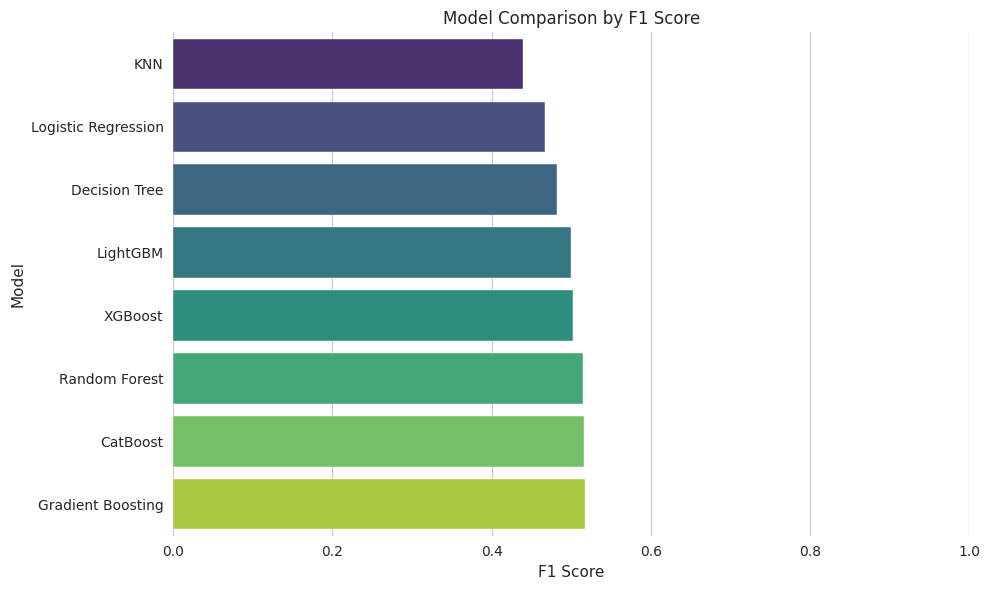

In [114]:


plt.figure(figsize=(10, 6))
sns.barplot(x='F1 Score', y='Model', data=summary_df.sort_values(by='F1 Score'), palette='viridis')
plt.title('Model Comparison by F1 Score')
plt.xlabel('F1 Score')
plt.ylabel('Model')
plt.xlim(0, 1)
plt.tight_layout()
plt.show()


**ROC COMPARISON CURVES**

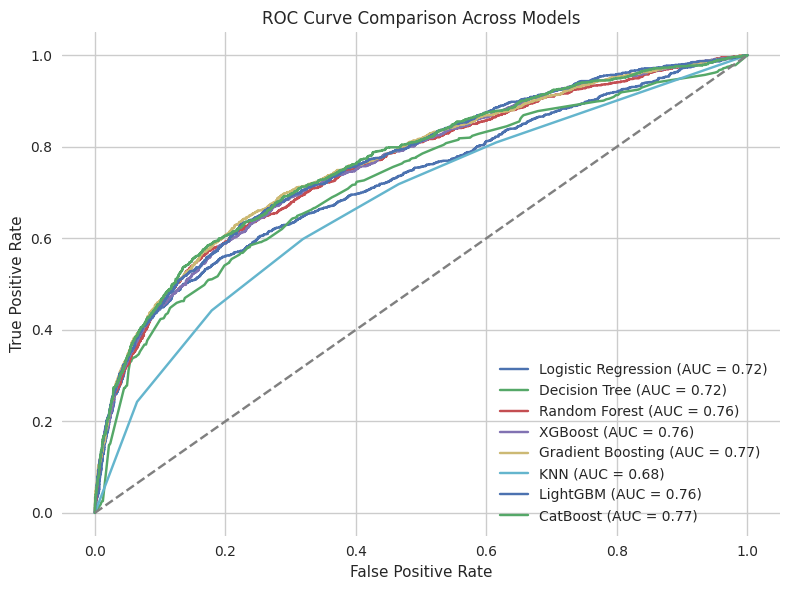

In [120]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(8, 6))

models = {
    'Logistic Regression': log_model,
    'Decision Tree': dt_model,
    'Random Forest': rf_model,
    'XGBoost': xgb_model,
    'Gradient Boosting': gb_model,
    'KNN': knn_model,
    'LightGBM': lgbm_model,
    'CatBoost': catboost_model
}

for name, model in models.items():
    probs = model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test_20, probs)
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.2f})")

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC Curve Comparison Across Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.tight_layout()
plt.show()


**RECALL CURVES**

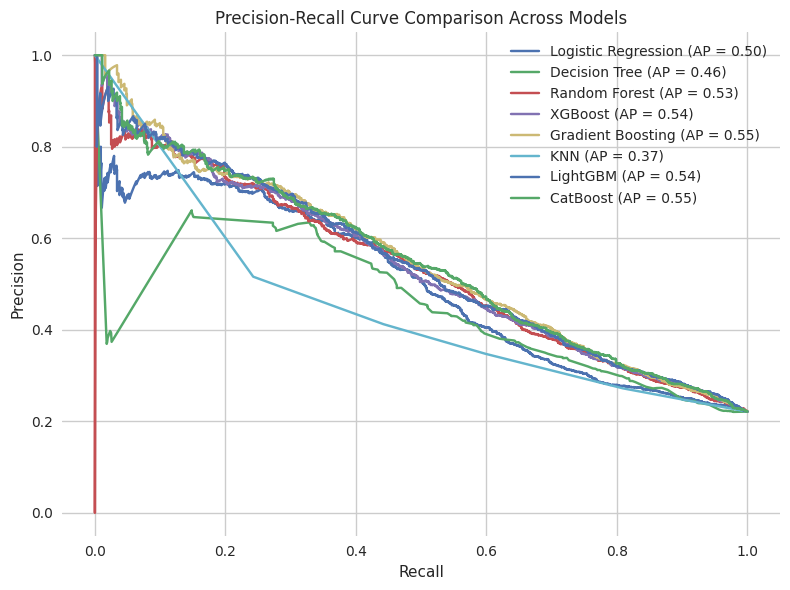

In [121]:
from sklearn.metrics import precision_recall_curve, average_precision_score

plt.figure(figsize=(8, 6))

for name, model in models.items():
    probs = model.predict_proba(X_test_scaled)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test_20, probs)
    ap_score = average_precision_score(y_test_20, probs)
    plt.plot(recall, precision, label=f"{name} (AP = {ap_score:.2f})")

plt.title('Precision-Recall Curve Comparison Across Models')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.tight_layout()
plt.show()


**Precision & Recall vs Threshold**

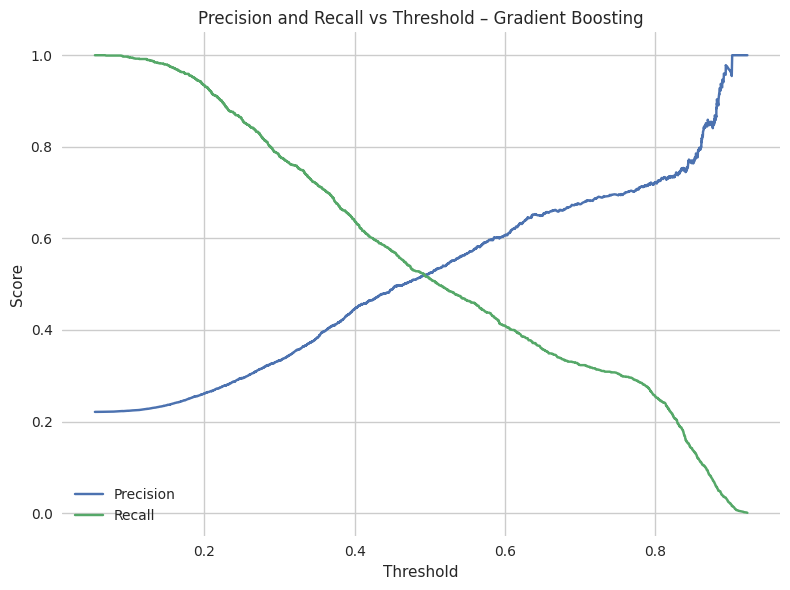

In [122]:
from sklearn.metrics import precision_recall_curve

probs = gb_model.predict_proba(X_test_scaled)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test_20, probs)

plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.title('Precision and Recall vs Threshold – Gradient Boosting')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


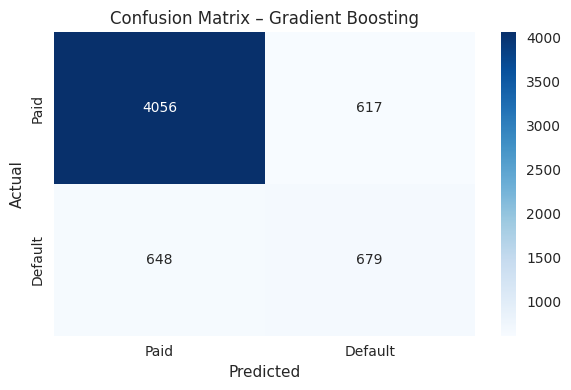

In [116]:

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_20, y_pred_gb)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Paid', 'Default'], yticklabels=['Paid', 'Default'])
plt.title('Confusion Matrix – Gradient Boosting')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()


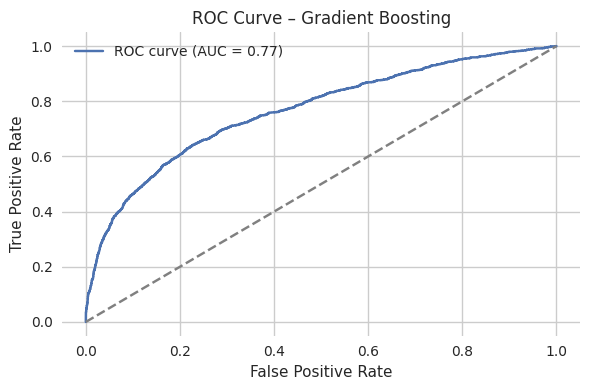

In [117]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test_20, gb_model.predict_proba(X_test_scaled)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC Curve – Gradient Boosting')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.tight_layout()
plt.show()


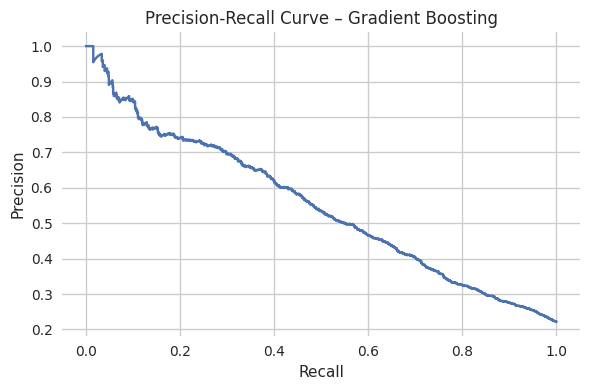

In [118]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test_20, gb_model.predict_proba(X_test_scaled)[:, 1])

plt.figure(figsize=(6,4))
plt.plot(recall, precision)
plt.title('Precision-Recall Curve – Gradient Boosting')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.tight_layout()
plt.show()


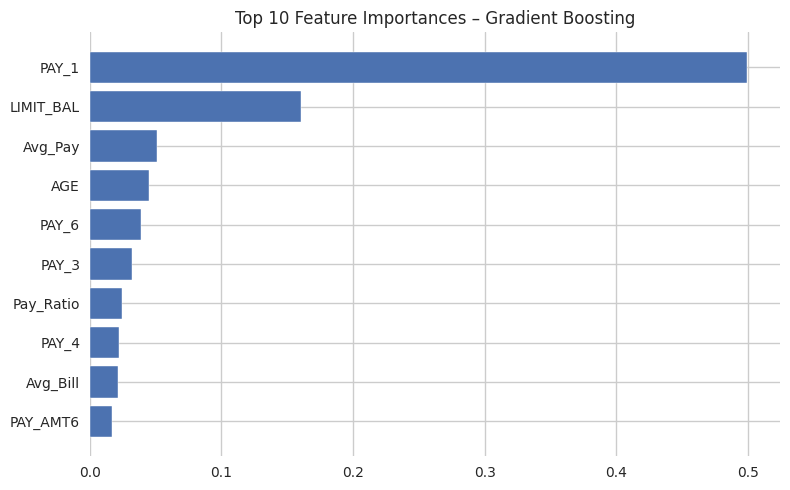

In [119]:
import numpy as np

importances = gb_model.feature_importances_
indices = np.argsort(importances)[-10:]  # Top 10

plt.figure(figsize=(8, 5))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [X_train_enc.columns[i] for i in indices])
plt.title('Top 10 Feature Importances – Gradient Boosting')
plt.tight_layout()
plt.show()
